[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%203/3.13_tensorflow_datasets.ipynb)

In [20]:
import tensorflow_datasets as tfds

Label: 66, Coarse: 12, ID: b'train_16399'


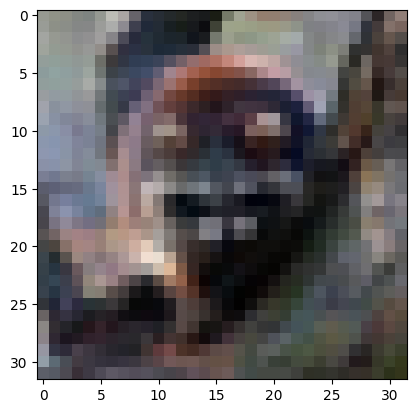

In [40]:

# cifar100 데이터셋 이름 지정
dataset_name = 'cifar100'
# 데이터셋 로드
ds = tfds.load(dataset_name, split='train')
ds

for data in ds.take(1):
    import matplotlib.pyplot as plt
    img = data['image'].numpy()
    print(f"Label: {data['label'].numpy()}, Coarse: {data['coarse_label'].numpy()}, ID: {data['id'].numpy()}")
    plt.imshow(img)
    plt.show()

In [39]:
'''
import os
import pickle
import numpy as np
import tensorflow as tf

def load_cifar100_correct(folder, split='train'):
    with open(os.path.join(folder, split), 'rb') as f:
        data = pickle.load(f, encoding='bytes')

    images_flat = data[b'data']  # (N, 3072)
    num_samples = images_flat.shape[0]
    # 올바른 reshape, transpose 순서
    images = images_flat.reshape(num_samples, 3, 32, 32).transpose(0, 2, 3, 1).astype(np.uint8)

    fine_labels = np.array(data[b'fine_labels'], dtype=np.int64)
    coarse_labels = np.array(data[b'coarse_labels'], dtype=np.int64)
    ids = np.array([f"{split}_{i:05d}".encode() for i in range(num_samples)])

    ds = tf.data.Dataset.from_tensor_slices({
        'image': images,
        'label': fine_labels,
        'coarse_label': coarse_labels,
        'id': ids
    })
    return ds

data_path = '../dataset/cifar100/cifar-100-python'
ds = load_cifar100_correct(data_path)

for data in ds.take(1):
    import matplotlib.pyplot as plt
    img = data['image'].numpy()
    print(f"Label: {data['label'].numpy()}, Coarse: {data['coarse_label'].numpy()}, ID: {data['id'].numpy()}")
    plt.imshow(img)
    plt.show()

'''    

'\nimport os\nimport pickle\nimport numpy as np\nimport tensorflow as tf\n\ndef load_cifar100_correct(folder, split=\'train\'):\n    with open(os.path.join(folder, split), \'rb\') as f:\n        data = pickle.load(f, encoding=\'bytes\')\n\n    images_flat = data[b\'data\']  # (N, 3072)\n    num_samples = images_flat.shape[0]\n    # 올바른 reshape, transpose 순서\n    images = images_flat.reshape(num_samples, 3, 32, 32).transpose(0, 2, 3, 1).astype(np.uint8)\n\n    fine_labels = np.array(data[b\'fine_labels\'], dtype=np.int64)\n    coarse_labels = np.array(data[b\'coarse_labels\'], dtype=np.int64)\n    ids = np.array([f"{split}_{i:05d}".encode() for i in range(num_samples)])\n\n    ds = tf.data.Dataset.from_tensor_slices({\n        \'image\': images,\n        \'label\': fine_labels,\n        \'coarse_label\': coarse_labels,\n        \'id\': ids\n    })\n    return ds\n\ndata_path = \'../dataset/cifar100/cifar-100-python\'\nds = load_cifar100_correct(data_path)\n\nfor data in ds.take(1):\n   

In [41]:
# 5개의 데이터 출력
for data in ds.take(5):
    #print(repr(type(data)))
    print({k: v for k, v in data.items()})

{'coarse_label': <tf.Tensor: shape=(), dtype=int64, numpy=12>, 'id': <tf.Tensor: shape=(), dtype=string, numpy=b'train_16399'>, 'image': <tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[151, 154, 145],
        [144, 147, 135],
        [141, 143, 134],
        ...,
        [ 44,  38,  39],
        [112, 100,  96],
        [145, 127, 120]],

       [[153, 156, 150],
        [141, 144, 135],
        [139, 142, 136],
        ...,
        [ 68,  59,  59],
        [131, 113, 106],
        [121, 101,  94]],

       [[163, 165, 161],
        [150, 153, 145],
        [147, 149, 144],
        ...,
        [ 75,  66,  60],
        [101,  86,  77],
        [ 83,  77,  73]],

       ...,

       [[150, 150, 162],
        [ 51,  52,  67],
        [ 46,  42,  56],
        ...,
        [ 60,  59,  48],
        [ 71,  73,  56],
        [ 58,  62,  44]],

       [[146, 158, 168],
        [ 92, 106, 116],
        [ 73,  77,  85],
        ...,
        [ 54,  55,  40],
        [ 59,  66,  41],
 

In [15]:
# 5개의 데이터 출력
for data in ds.take(5):
    # image
    image = data['image']
    # label
    label = data['label']
    print(image.shape)
    print(label)

(32, 32, 3)
tf.Tensor(66, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(23, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(40, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(39, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(7, shape=(), dtype=int64)


In [16]:
# as_supervised=True는 tuple 형식으로 x, y 데이터를 로드
ds = tfds.load(dataset_name, split='train', as_supervised=True)

for image, label in ds.take(5):
    print(image.shape, label)

(32, 32, 3) tf.Tensor(66, shape=(), dtype=int64)
(32, 32, 3) tf.Tensor(23, shape=(), dtype=int64)
(32, 32, 3) tf.Tensor(40, shape=(), dtype=int64)
(32, 32, 3) tf.Tensor(39, shape=(), dtype=int64)
(32, 32, 3) tf.Tensor(7, shape=(), dtype=int64)


In [17]:
# with_info=True 로 데이터셋의 정보 로드
ds, info = tfds.load(dataset_name, split='train', with_info=True)

# info 확인
info

tfds.core.DatasetInfo(
    name='cifar100',
    full_name='cifar100/3.0.2',
    description="""
    This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_dir='C:\\Users\\coffee\\tensorflow_datasets\\cifar100\\3.0.2',
    file_format=tfrecord,
    download_size=160.71 MiB,
    dataset_size=132.03 MiB,
    features=FeaturesDict({
        'coarse_label': ClassLabel(shape=(), dtype=int64, num_classes=20),
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=100),
    }),
    supervised_keys=('image', 'label'),
 